# ICU survivor prediction
# Machine Learning, Exercise 1
### 王敏行 id:2018012386 wangmx18@mails.tsinghua.edu.cn
**All following codes originally generated by myself.**
Please see rm.md before running this file.

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score

x_tr1 = np.array(pd.read_csv('data1forEx1to4/train1_icu_data.csv'))
y_tr1 = np.array(pd.read_csv('data1forEx1to4/train1_icu_label.csv'))
x_tr2 = np.array(pd.read_csv('data1forEx1to4/train2_icu_data.csv'))
y_tr2 = np.array(pd.read_csv('data1forEx1to4/train2_icu_label.csv'))
x_ts1 = np.array(pd.read_csv('data1forEx1to4/test1_icu_data.csv'))
y_ts1 = np.array(pd.read_csv('data1forEx1to4/test1_icu_label.csv'))
x_ts2 = np.array(pd.read_csv('data1forEx1to4/test2_icu_data.csv'))
y_ts2 = np.array(pd.read_csv('data1forEx1to4/test2_icu_label.csv'))

def get_index(x,y):
    id0 = np.array([index for (index, value) in enumerate(y) if value ==0])
    id1 = np.array([index for (index, value) in enumerate(y) if value ==1])
    s1=x[id0]
    s2=x[id1]
    return s1,s2


## Part3: Logistic Regression

In [12]:
def sigmoid(x):
    # eps = np.finfo(np.float32).eps
    return 1/(1+np.exp(-x))

def train_LR(x,y, max_itr=100, lr0=0.005, decay_lr=0):
    w = np.random.randn(1,x.shape[1])
    b=0

    acc=[]
    x0 = []
    for i in range(max_itr):
        lr = lr0/(1+decay_lr*i)
        for j in range(x.shape[0]):
            delta = (sigmoid(np.dot(w,x[j,:])+b)-y[j])*x[j,:]
            w += -lr/x.shape[0]*delta
        if i%10:
            res = pred_LR(x, w,b)
            acc.append(accuracy_score(y,res))
            x0.append(i)
        
    return w,b,x0,acc

def pred_LR(x, w, b):
    pred = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        out = (np.dot(w,x[i,:])+b)
        if out>0:
            pred[i,0]=1
    return pred

### trainset1, testset1

acc on trainset1: 0.6992
acc on testset1: 0.7192342752962625


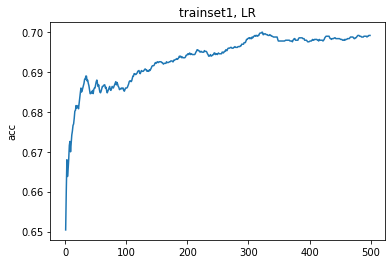

In [18]:
w1,b1,t,acc = train_LR(x_tr1, y_tr1, max_itr=500, lr0=0.5, decay_lr=1)
res1 = pred_LR(x_tr1, w1,b1)
acc1 = accuracy_score(y_tr1,res1)
print('acc on trainset1:',acc1)
pred1 = pred_LR(x_ts1, w1,b1)
acc11 = accuracy_score(y_ts1,pred1)
print('acc on testset1:',acc11)

plt.figure()
plt.title('trainset1, LR')
plt.ylabel('acc')
plt.plot(t,acc)
plt.show()

### AUC characterization

auc is 0.7659226890756301


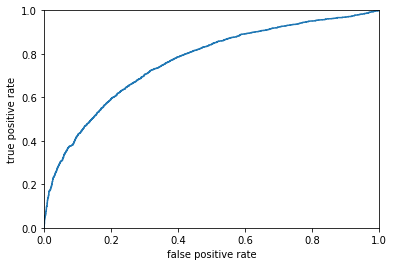

In [23]:
from sklearn.metrics import roc_curve,auc
def score_LR(x,w,b):
    # score = np.zeros((x.shape[0],1))
    score = sigmoid(np.dot(x,w.T)+b)
    return score

score1 = score_LR(x_tr1, w1,b1)


fpr,tpr,thr = roc_curve(y_tr1,score1)
auroc = auc(fpr,tpr)
print('auc is',auroc)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()